## Задание 1

Сотрудник службы оценки качества продукции заметил, что число бракованных листов стали в партии для стали марки A больше, чем для стали марки B. Также он обратил внимание, что при средней скорости прокатки более 4 м/с число бракованных листов больше. В соответствии с этими наблюдениями, предлагается снизить скорость прокатки и ввести дополнительные меры контроля качества для стали марки A.  

Обоснуйте, что:

1)	Более 3 бракованных листов на партию выходит значимо чаще для стали марки А, чем для стали марки B.

2)	При скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию выходит значимо чаще, чем при меньших скоростях прокатки. 

Данные, необходимые для анализа, содержатся в файле «Статистика за 2018 год». Количество листов стали в каждой партии предполагается одинаковым. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Для начала, рассмотрим структуру данных:

In [2]:
df = pd.read_csv('Статистика за 2018 год.csv', encoding = 'cp1251')

In [3]:
df.head()

,Число бракованных листов,Скорость прокатки,Марка стали
0,3,3.8,A
1,3,3.8,B
2,3,4.8,B
3,4,4.4,B
4,6,5.0,B


Всего в датафрейме 237 партий, пропусков в строках нет:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
Число бракованных листов    237 non-null int64
Скорость прокатки           237 non-null float64
Марка стали                 237 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ KB


Если удалить дубликаты, то останется всего 167 партий. По хорошему, нужно проверить достоверность данных и понять - это на самом деле дубликаты или просто партии с одинаковыми характеристиками?
В тестовом задании буду считать, что действительно разные партии и у них совпали показатели.

In [6]:
df_dd = df.drop_duplicates()
df_dd.shape

(167, 3)

Посмотрим распределение по маркам стали. Партий марки А примерно на 30% больше, чем марки B. В дальнейшем будем это учитывать.

In [7]:
df.groupby('Марка стали').count().reset_index()

,Марка стали,Число бракованных листов,Скорость прокатки
0,A,139,139
1,B,98,98


Теперь посмотрим некоторые статистические показатели. Среднее количество бракованных листов в партии - 3 штуки, средняя скорость прокатки - 4.5 м/с.

In [8]:
df.describe()

,Число бракованных листов,Скорость прокатки
count,237.000000,237.000000
mean,3.257384,4.509705
std,1.807821,0.696260
min,0.000000,2.500000
25%,2.000000,4.100000
50%,3.000000,4.600000
75%,4.000000,5.000000
max,8.000000,6.500000


Поистроим гистограмму распределения по числу бракованных листов.

Распределение близко к нормальному. Чаще всего в партии 2-4 бракованных листа. Реже всего встречаются партии с 8 бракованными листами или без бракованных листов.

Text(0, 0.5, 'Партий')

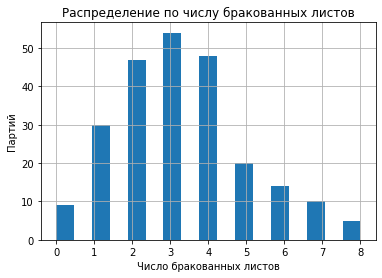

In [9]:
ax = df['Число бракованных листов'].hist(bins=17)
ax.set_title('Распределение по числу бракованных листов')
ax.set_xlabel('Число бракованных листов')
ax.set_ylabel('Партий')

Проверим, значительно ли чаще выходит больше 3-х бракованных листов на партию для марки А, чем для марки В?
В абсолютном выражении число партий с 4 и более бракованными листами для марки А больше, но так как количество партий по маркам не сбалансировано, то надо смотреть в относительном выражении.

In [10]:
df[df['Число бракованных листов'] > 3].groupby('Марка стали').count().reset_index()

,Марка стали,Число бракованных листов,Скорость прокатки
0,A,53,53
1,B,44,44


#### Для стали марки А доля партий с 4 и более бракованными листами ниже, чем для марки В.

In [11]:
print(f'Доля партий с 4 и более бракованными листами для марки стали А: {round(53/139*100, 1)}%')
print(f'Доля партий с 4 и более бракованными листами для марки стали B: {round(44/98*100, 1)}%')

Доля партий с 4 и более бракованными листами для марки стали А: 38.1%
Доля партий с 4 и более бракованными листами для марки стали B: 44.9%


Теперь перейдем к скорости прокатки. Распределение скорости прокатки также близко к нормальному. Скорость прокатки варьируется от 2.5 до 6.5 м/с:

Text(0, 0.5, 'партий')

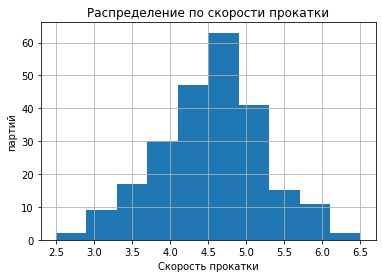

In [12]:
ax = df['Скорость прокатки'].hist()
ax.set_title('Распределение по скорости прокатки')
ax.set_xlabel('Скорость прокатки')
ax.set_ylabel('партий')

Посмотрим количество партий с более, чем 3 бракованными листами при скорости прокатки больше 4 м/с: 74 штуки.

In [300]:
df[(df['Число бракованных листов'] > 3) & (df['Скорость прокатки'] > 4)]['Число бракованных листов'].count()

74

Со скоростью 4 и менее: 23

In [301]:
df[(df['Число бракованных листов'] > 3) & (df['Скорость прокатки'] <= 4)]['Число бракованных листов'].count()

23

#### Таким образом, при скорости прокатки более 4 м/с, партии с 4+ бракованными листами встречаются в 3 раза чаще

Но при этом, корреляция между скоростью прокатки и количеством бракованных листов отсутствует:

In [276]:
df.corr()

,Число бракованных листов,Скорость прокатки
Число бракованных листов,1.000000,0.011473
Скорость прокатки,0.011473,1.000000


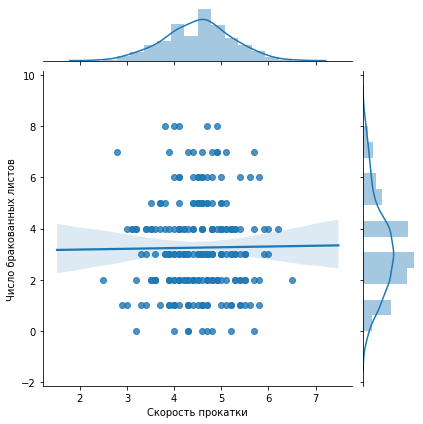

In [13]:
sns.jointplot(x='Скорость прокатки', y='Число бракованных листов', 
              data=df, kind='reg')

## Задание 2

Вам необходимо построить модель, которая на основании данных, поступающих каждую минуту, определяют качество продукции, производимое на обжиговой машине.

Обжиговая машина представляет собой агрегат, состоящий из 5 одинаковых по размеру камер, в каждой камере установлено по 3 датчика температур. Кроме этого, для данной задачи Вы собрали данные о высоте слоя сырья и его влажности. Высота слоя и влажность измеряются при входе сырья в машину. Сырье проходит через обжиговую машину за час.

Качество продукции измеряется в лаборатории по пробам, которые забираются каждый час, данные по известным анализам содержатся в файле Y_train.csv. В файле указано время забора пробы, проба забирается на выходе из обжиговой машины.

Вы договорились с заказчиком, что оценкой модели будет являться показатель MAE, для оценки модели необходимо сгенерировать предсказания за период, указанный в файле Y_submit.csv (5808 предиктов).


Загрузим данные и посмотрим структуру файлов:

In [182]:
x_data = pd.read_csv('X_data.csv', sep = ';')
y_submit = pd.read_csv('Y_submit.csv', encoding = 'cp1251', sep = ';', header= None)
y_train = pd.read_csv('Y_train.csv', encoding = 'cp1251', sep = ';', header= None)

In [183]:
x_data.rename(columns={'Unnamed: 0': 'DT_x'}, inplace=True)
x_data.head()

,DT_x,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
3,2015-01-01 00:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
4,2015-01-01 00:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22


В файле 18 параметров и более 2 млн измерений:

In [184]:
x_data.shape

(2103841, 18)

Результатов проб значительно меньше:

In [185]:
y_train.rename(columns={0: 'DT_y', 1: 'Quality'}, inplace=True)
y_train.tail()

,DT_y,Quality
29179,2018-05-03 19:05:00,438
29180,2018-05-03 20:05:00,452
29181,2018-05-03 21:05:00,455
29182,2018-05-03 22:05:00,455
29183,2018-05-03 23:05:00,454


Структура файла для предиктов аналогична y_train:

In [186]:
y_submit.rename(columns={0: 'DT_y', 1: 'Quality'}, inplace=True)
y_submit.tail()

,DT_y,Quality
5803,2018-12-31 19:05:00,420
5804,2018-12-31 20:05:00,420
5805,2018-12-31 21:05:00,420
5806,2018-12-31 22:05:00,420
5807,2018-12-31 23:05:00,420


Задачу планирую решать следующим образом: поскольку сырье проходит через обжиговую машину за час, то для каждой оценки качества я найду показания с приборов, которые были получены за час до таймстемпа качества. Остальные показания приборов я выброшу из обучающей выборки т.к. для них нет оценки качества. Далее, на получившемся датасете я обучу несколько алгоритмов, попробую подобрать оптимальные параметры, оценю качество по МАЕ и выберу лучшую из них. И далее уже сгенерирую предсказания.

Для начала, необходимо перевести столбцы в нужный формат, чтобы работать с датой и временем:

In [187]:
x_data['DT_x'] = pd.to_datetime(x_data['DT_x'], format='%Y-%m-%d %H:%M:%S')
y_train['DT_y'] = pd.to_datetime(y_train['DT_y'], format='%Y-%m-%d %H:%M:%S')
y_submit['DT_y'] = pd.to_datetime(y_submit['DT_y'], format='%Y-%m-%d %H:%M:%S')

In [188]:
from datetime import timedelta

Вычитаю из времени замера качества 1 час, т.е. нахожу время когда сырье входило в обжиговую машину:

In [189]:
y_train['DT_x'] = y_train['DT_y'] - timedelta(hours = 1)
y_submit['DT_x'] = y_submit['DT_y'] - timedelta(hours = 1)

Для самопроверки корретности вычислений:

In [190]:
y_train[['DT_y', 'DT_x']].head()

,DT_y,DT_x
0,2015-01-04 00:05:00,2015-01-03 23:05:00
1,2015-01-04 01:05:00,2015-01-04 00:05:00
2,2015-01-04 02:05:00,2015-01-04 01:05:00
3,2015-01-04 03:05:00,2015-01-04 02:05:00
4,2015-01-04 04:05:00,2015-01-04 03:05:00


Теперь через получившиеся значения времени объединю с датафреймом показателей счетчиков:

In [191]:
df_train = pd.merge(y_train, x_data, on = 'DT_x', how = 'left')

In [192]:
df_train.tail()

,DT_y,Quality,DT_x,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
29179,2018-05-03 19:05:00,438,2018-05-03 18:05:00,256,249,261,381,388,367,456,327,465,357,356,350,242,258,261,156.23,7.79
29180,2018-05-03 20:05:00,452,2018-05-03 19:05:00,257,258,266,379,381,358,449,386,461,354,350,349,234,254,252,157.47,7.33
29181,2018-05-03 21:05:00,455,2018-05-03 20:05:00,259,255,260,372,367,362,431,461,453,360,344,348,235,253,247,157.17,7.87
29182,2018-05-03 22:05:00,455,2018-05-03 21:05:00,260,254,263,364,349,352,429,425,446,348,360,345,256,257,247,155.00,7.65
29183,2018-05-03 23:05:00,454,2018-05-03 22:05:00,255,255,260,356,352,354,438,468,441,347,357,344,254,265,248,153.89,8.90


Для каждой оценки качества нашлась соответсвующая пара в таблице с измерениями. Пропусков данных в получившемся датафрейме нет

In [193]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29184 entries, 0 to 29183
Data columns (total 20 columns):
DT_y          29184 non-null datetime64[ns]
Quality       29184 non-null int64
DT_x          29184 non-null datetime64[ns]
T_data_1_1    29184 non-null int64
T_data_1_2    29184 non-null int64
T_data_1_3    29184 non-null int64
T_data_2_1    29184 non-null int64
T_data_2_2    29184 non-null int64
T_data_2_3    29184 non-null int64
T_data_3_1    29184 non-null int64
T_data_3_2    29184 non-null int64
T_data_3_3    29184 non-null int64
T_data_4_1    29184 non-null int64
T_data_4_2    29184 non-null int64
T_data_4_3    29184 non-null int64
T_data_5_1    29184 non-null int64
T_data_5_2    29184 non-null int64
T_data_5_3    29184 non-null int64
H_data        29184 non-null float64
AH_data       29184 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(16)
memory usage: 4.7 MB


Проверка на возможные дубликаты в дф, их нет:

In [194]:
df_train2 = df_train.drop_duplicates()
df_train2.shape

(29184, 20)

Посмотрим некоторые статистические показатели. В глаза бросаются отрицательные минимальные значения температур. По логике, в обжиговой камере очень высокие температуры и никак не отрицательные:

In [195]:
df_train.describe()

,Quality,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
count,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000
mean,402.800747,250.034677,249.816989,250.152823,349.802529,349.717071,349.950898,501.164439,500.919511,501.321580,348.955626,348.952200,349.673691,249.799925,249.670676,249.848684,174.749959,7.500540
std,46.273228,32.350477,30.458330,30.635361,43.752567,41.415114,38.016837,62.417629,64.634310,61.481774,38.755893,40.172427,39.733110,30.780705,30.545894,30.630193,14.404037,1.146928
min,221.000000,-193.000000,-120.000000,-96.000000,-703.000000,-914.000000,-186.000000,-591.000000,-759.000000,-441.000000,-441.000000,-446.000000,-594.000000,-82.000000,-106.000000,-128.000000,145.000000,3.120000
25%,372.000000,228.000000,228.000000,229.000000,328.000000,328.000000,328.000000,464.000000,463.000000,464.000000,327.000000,327.000000,327.000000,229.000000,229.000000,228.000000,162.460000,6.730000
50%,408.000000,250.000000,250.000000,250.000000,350.000000,350.000000,350.000000,502.000000,502.000000,502.000000,349.000000,349.000000,350.000000,250.000000,250.000000,250.000000,174.400000,7.510000
75%,439.000000,272.000000,271.000000,272.000000,372.000000,372.000000,372.000000,538.000000,537.000000,539.000000,371.000000,371.000000,371.000000,271.000000,271.000000,271.000000,186.980000,8.280000
max,505.000000,722.000000,564.000000,643.000000,1299.000000,1178.000000,886.000000,1491.000000,2492.000000,1294.000000,1136.000000,1204.000000,944.000000,879.000000,737.000000,619.000000,206.680000,11.620000


Посмотрим, сколько строк с отрицательными значениями температур:

In [196]:
df_train.columns

Index(['DT_y', 'Quality', 'DT_x', 'T_data_1_1', 'T_data_1_2', 'T_data_1_3',
       'T_data_2_1', 'T_data_2_2', 'T_data_2_3', 'T_data_3_1', 'T_data_3_2',
       'T_data_3_3', 'T_data_4_1', 'T_data_4_2', 'T_data_4_3', 'T_data_5_1',
       'T_data_5_2', 'T_data_5_3', 'H_data', 'AH_data'],
      dtype='object')

Строк, в которых есть неположительные значения температур всего 195 - относительно немного для 29 тыс. измерений:

In [197]:
df_train[(df_train['T_data_1_1'] <= 0) | (df_train['T_data_1_2'] <= 0) | (df_train['T_data_1_3'] <= 0) | 
         (df_train['T_data_2_1'] <= 0) | (df_train['T_data_2_2'] <= 0) | (df_train['T_data_3_1'] <= 0) |
         (df_train['T_data_3_1'] <= 0) | (df_train['T_data_3_2'] <= 0) | (df_train['T_data_3_3'] <= 0) |
         (df_train['T_data_4_1'] <= 0) | (df_train['T_data_4_2'] <= 0) | (df_train['T_data_4_3'] <= 0) |
         (df_train['T_data_5_1'] <= 0) | (df_train['T_data_5_2'] <= 0) | (df_train['T_data_5_3'] <= 0)].shape

(195, 20)

Посмотрим, есть ли в наборах данных для прогноза отрицательные температуры. Оказывается, тоже есть есть:

In [198]:
df_submit = pd.merge(y_submit, x_data, on = 'DT_x', how = 'left')
df_submit.describe()

,Quality,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
count,5808.0,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000
mean,420.0,250.775826,251.290289,250.641529,349.825585,349.683712,349.184917,500.952135,501.948864,500.840565,351.153065,351.877410,351.972452,249.379649,249.388602,248.962466,174.811904,7.491811
std,0.0,31.037089,32.428147,30.962828,34.359124,36.603541,38.072745,67.874435,57.606621,66.309021,40.812265,33.351799,42.538706,30.626060,30.027850,31.249607,14.539171,1.152877
min,420.0,26.000000,-37.000000,-58.000000,6.000000,-162.000000,23.000000,-770.000000,-16.000000,-463.000000,-239.000000,33.000000,-417.000000,19.000000,53.000000,-155.000000,143.520000,2.890000
25%,420.0,229.000000,229.000000,229.000000,327.000000,327.000000,327.000000,463.000000,466.000000,465.000000,330.000000,331.000000,331.000000,229.000000,229.000000,229.000000,162.380000,6.700000
50%,420.0,251.000000,252.000000,252.000000,350.000000,349.000000,349.000000,500.000000,500.000000,501.000000,352.000000,352.000000,352.000000,249.000000,249.000000,249.000000,174.830000,7.500000
75%,420.0,272.000000,273.000000,272.000000,372.000000,373.000000,372.000000,540.000000,538.000000,539.000000,373.000000,373.000000,373.000000,270.000000,270.000000,270.000000,187.452500,8.250000
max,420.0,530.000000,762.000000,522.000000,708.000000,772.000000,856.000000,1277.000000,1264.000000,982.000000,966.000000,661.000000,809.000000,558.000000,549.000000,535.000000,203.560000,11.840000


Есть несколько вариантов, например: оставить данные как есть, заменить неположительные значения средним / медианой или просто выкинуть. Заменять тоже можно по-разному - как и средним (медианой) значением по столбцу, так и средним (медианой) по строке или средним по камере - подходов может быть множество, лучше, конечно поговорить с экспертом в области производства и понять какой подход будет в данном случае оптимальным. Для данной задачи выберу замену средним значением по столбцу:

Скопирую датасет, чтобы изменять значения в нем, а не в исходном:

In [199]:
df_train_w = df_train.copy()

In [278]:
col_list = ['T_data_1_1', 'T_data_1_2', 'T_data_1_3', 'T_data_2_1', 'T_data_2_2', 'T_data_2_3', 'T_data_3_1', 'T_data_3_2',
       'T_data_3_3', 'T_data_4_1', 'T_data_4_2', 'T_data_4_3', 'T_data_5_1', 'T_data_5_2', 'T_data_5_3']
for column in col_list:
    for i in range(len(df_train_w[column])):
        if df_train_w[column][i] <= 0:
             df_train_w[column][i] = df_train_w[column].mean()

Аналогичную операцию проведу с тестовым датасетом:

In [201]:
df_submit_w = df_submit.copy()

In [279]:
for column in col_list:
    for i in range(len(df_submit_w[column])):
        if df_submit_w[column][i] <= 0:
             df_submit_w[column][i] = df_train_w[column].mean()

Еще один важный момент перед построением модели - посмотреть корреляцию параметров. У показателя качества заметная обратная корреляция с датчиками камеры 3. Также заметно, что каждая группа датчиков имеет ощутимую корреляю внутри своей группы. Сильной корреляции между показателями нет, поэтому удалять никакие признаки не буду.

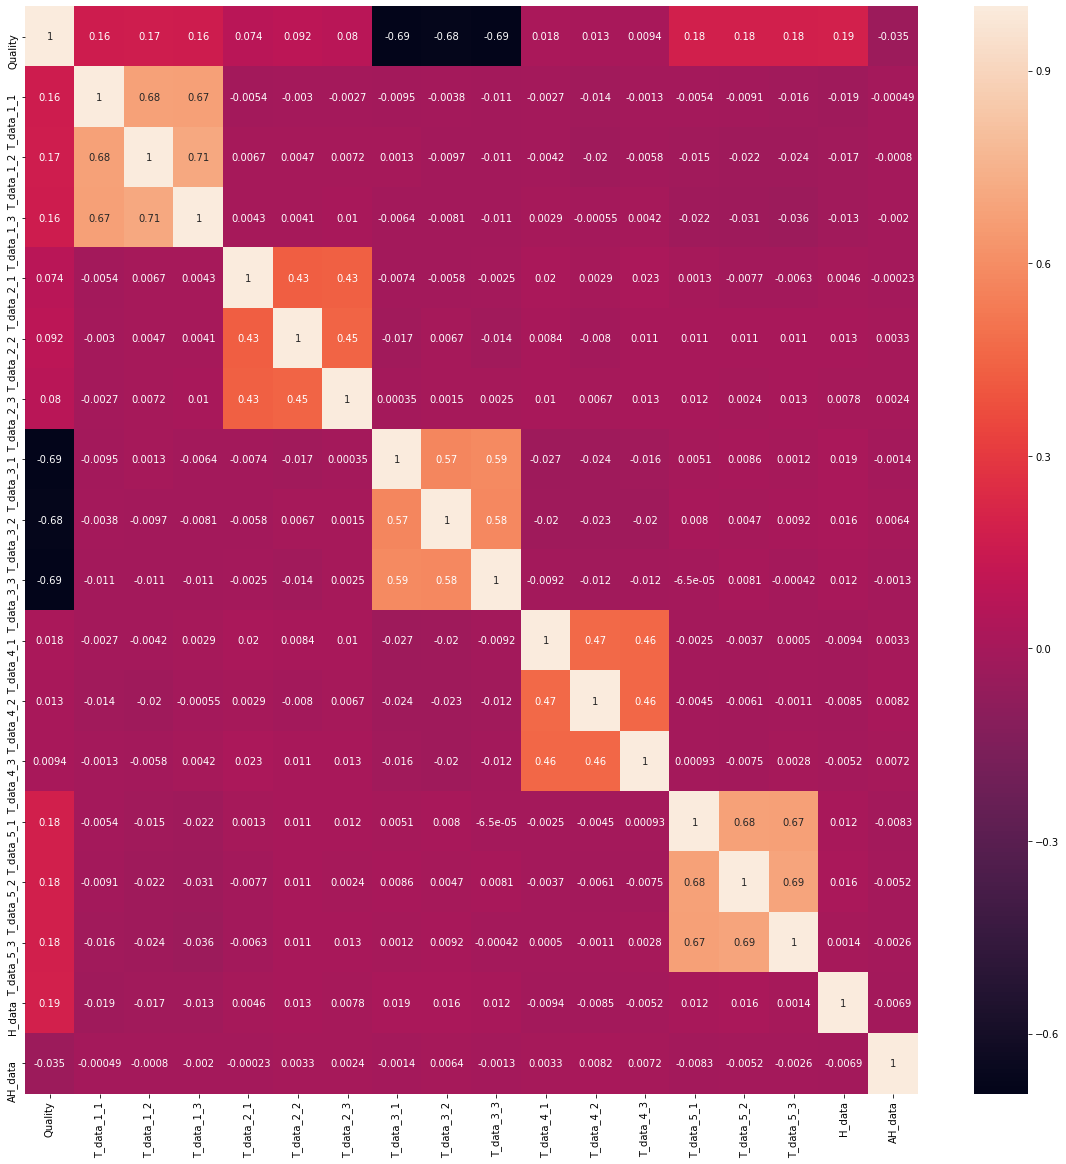

In [203]:
ax = plt.subplots(figsize=(20,20))
sns.heatmap((df_train_w[['Quality', 'T_data_1_1', 'T_data_1_2', 'T_data_1_3','T_data_2_1', 'T_data_2_2', 'T_data_2_3', 
                       'T_data_3_1', 'T_data_3_2', 'T_data_3_3', 'T_data_4_1', 'T_data_4_2', 'T_data_4_3', 'T_data_5_1',
                       'T_data_5_2', 'T_data_5_3', 'H_data', 'AH_data']]).corr(), annot = True)

Разобьем датасет на тренировочную и тестовую выборки:

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
y = df_train_w['Quality']

In [206]:
x = df_train_w.drop(['DT_y', 'Quality', 'DT_x'], axis = 1)

In [207]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

Диапазон измерений параметров отличается, поэтому нормализуем данные:

In [208]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [209]:
x_test_std = scaler.fit_transform(x_test)
x_train_std = scaler.fit_transform(x_train)
y_test_std = scale(y_test)
y_train_std = scale(y_train)

Для решения нашей задачи я испробую 3 алгоритма: Random forest regressor, SVR и LightGMB

#### Random Forest Regressor:

In [210]:
from sklearn.ensemble import RandomForestRegressor

In [281]:
RFR = RandomForestRegressor(n_estimators = 500, max_depth = 20, max_features = 'auto', min_samples_leaf = 1, 
                            min_samples_split = 10, random_state = 10)

In [282]:
RFR.fit(x_train_std, y_train_std)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=10, verbose=0,
                      warm_start=False)

В нашем случае визуализации ненаглядны из-за большого числа измерений:

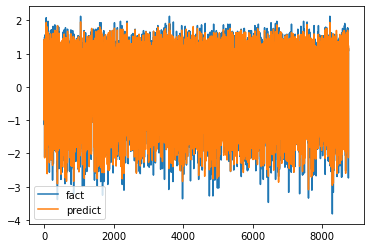

In [283]:
plt.plot(y_test_std, label = 'fact')
plt.plot(RFR.predict(x_test_std), label = 'predict')
plt.legend()

По заданию, оцениваем качество работы алгоритма с помощью MAE:

In [214]:
from sklearn.metrics import mean_absolute_error

In [284]:
mean_absolute_error(y_test_std, RFR.predict(x_test_std))

0.19549777083346384

Делать настройку параметров я буду с помощью GridSearchCV:
#### Вот тут fit занял у меня за 20 часов так и не отработал. Для тестового задания я ограничусь моделями без тюнинга

In [216]:
#from sklearn.model_selection import GridSearchCV

In [217]:
#RFR_gr = RandomForestRegressor(random_state = 10)

In [218]:
#parameters = {'n_estimators':[10, 20, 50, 100, 200, 500, 1000], 'max_depth':[None, 10, 20, 50, 100], 'max_features': 
#              ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}

In [219]:
#grid = GridSearchCV(RFR_gr, parameters, scoring='neg_mean_absolute_error')

In [220]:
#grid.fit(x_train_std, y_train_std)       

In [221]:
#print ('best n_estimators        = ', grid.best_estimator_.n_estimators)
#print ('best max_depth           = ', grid.best_estimator_.max_depth)
#print ('best max_features        = ', grid.best_estimator_.max_features)
#print ('best min_saples_leaf     = ', grid.best_estimator_.min_samples_leaf)
#print ('best min_samples_split   = ', grid.best_estimator_.min_samples_split)

Подставим подобранные значения в модель:

In [222]:
#RFR_gr = RandomForestRegressor(n_estimators = , max_depth = , max_features = '', 
#                               min_samples_leaf = , min_samples_split = )

In [223]:
#RFR_gr.fit(x_train_std, y_train_std)

Оценка качества:

In [224]:
#mean_absolute_error(y_test_std, RFR_gr.predict(x_test_std))

#### SVR:

In [225]:
from sklearn.svm import SVR

In [288]:
SVR_res = SVR()

In [289]:
SVR_res.fit(x_train_std, y_train_std)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Оценка качества модели:

In [290]:
mean_absolute_error(y_test_std, SVR_res.predict(x_test_std))

0.21868287011985107

#### LightGBM

In [236]:
import lightgbm

In [237]:
lgbm_train = lightgbm.Dataset(x_train_std, label = y_train_std)

In [238]:
params = {}
params['learning_rate'] = 0.1
params['boosting_type'] = 'gbdt'
params['sub_feature'] = 0.5
params['min_data'] = 50
params['max_depth'] = 10

In [239]:
LGBM = lightgbm.train(params, lgbm_train)

Оценка качества:

In [240]:
mean_absolute_error(y_test_std, LGBM.predict(x_test_std))

0.2057310840456611

Сравним полученные результаты.

In [291]:
res = {'Model':['Random Forest Regressor', 'SVR', 'Light GBM'], 
       'MAE':
                  [mean_absolute_error(y_test_std, RFR.predict(x_test_std)),
                  mean_absolute_error(y_test_std, SVR_res.predict(x_test_std)),
                  mean_absolute_error(y_test_std, LGBM.predict(x_test_std))]}

In [292]:
quality = pd.DataFrame(res)

Показатель данной метрики должен стремиться к 0, поэтому лучше результаты показал RFR. Чтобы еще улучшить алгоритмы можно попробовать:

1. Разобраться с отрицательными значениями датчиков, понять как лучше заполнять такие значения, попробовать несколько методов.
2. Подобрать оптимальные параметры для алгоритмов

В рамках текущего задания я остановлюсь на этих результатах.

In [293]:
quality.sort_values('MAE')

,Model,MAE
0,Random Forest Regressor,0.195498
2,Light GBM,0.205731
1,SVR,0.218683


Применим к тестовому датасету:

In [261]:
df_submit_w2 = df_submit_w.drop(['DT_y', 'Quality', 'DT_x'], axis = 1)  

In [262]:
df_submit_std = scaler.fit_transform(df_submit_w2)

In [294]:
result = RFR.predict(df_submit_std)

Обратное преобразование:

In [295]:
y_scaler = scaler.fit(y_train.values.reshape(-1, 1))
result_inv = y_scaler.inverse_transform(result)

In [296]:
inv = pd.DataFrame(result_inv)

Результат:

In [297]:
pd_res = df_submit_w.join(inv)

In [298]:
pd_res = pd_res.rename(columns = {0 : 'Quality_pred'})[['DT_y', 'Quality_pred']]

In [299]:
pd_res.head()

,DT_y,Quality_pred
0,2018-05-04 00:05:00,452.867679
1,2018-05-04 01:05:00,443.780539
2,2018-05-04 02:05:00,444.921942
3,2018-05-04 03:05:00,424.393275
4,2018-05-04 04:05:00,403.551570


In [302]:
pd_res.to_csv('submission.csv', index = False)